In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading data
df = pd.read_csv("./kaggle_Interests_group.csv")
df.tail()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
6339,I,66,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


In [3]:
#getting data inforamtion(number of columns, entires etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to interest217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


In [4]:
#getting number of unique groups. As it is unsupervised learning we don't actually need it
df.group.unique()

array(['C', 'P', 'R', 'I'], dtype=object)

In [5]:
#filling NAN values with 0 and saving it to df
df.fillna(0, inplace=True)
df.tail()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
6335,I,53,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6336,I,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6337,I,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6338,I,38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
6339,I,66,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [6]:
#taking interest_1 - interest_217 columns as input features
X = df.iloc[:, 2:].values

In [7]:
#this step is only required for splitting data into stratify fashion
#however splitting data into train/test is not required in unsupervised learning
def encode(x):
    if x == 'C':
        x = 1
    elif x == 'P':
        x = 2
    elif x == 'R':
        x = 3
    elif x == 'I':
        x = 4
    else:
        raise ValueError("Invalid Category")
    return x

df['group'] = df['group'].apply(encode)
df.tail()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
6335,4,53,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6336,4,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6337,4,48,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6338,4,38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
6339,4,66,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [8]:
#splitting data into train test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df.group, test_size=0.2, stratify=df.group)

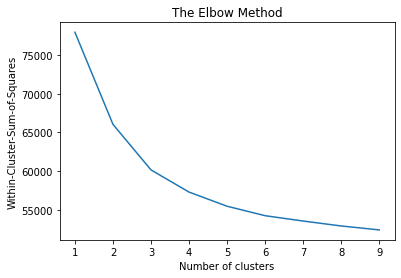

In [9]:
#In this block of code we are trying to do identify K of K-means clustering using elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
    model = KMeans(n_clusters = i)
    model.fit(X_train)
    wcss.append(model.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

In [10]:
#the graph is too smooth the chose the correct K here but we can go with K=3 or K=4
#Well in this case we already know that our data is divided into four groups so we will go with K=4

model = KMeans(n_clusters=4)

In [11]:
#predicting on X_train using our kmeans model
y_pred = model.fit_predict(X_train)

In [12]:
#for visualization purpose we will have to reduce out 217-dimention data to somewhat 2 or 3 dimension 
#for dimensionality reduction we will use principal component analysis method

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [13]:
#converting X_train of 217-dimension to Z of 2-dimension
Z = pca.fit_transform(X_train)

In [14]:
#checking shape of Z and y_pred
Z.shape, y_pred.shape

((5072, 2), (5072,))

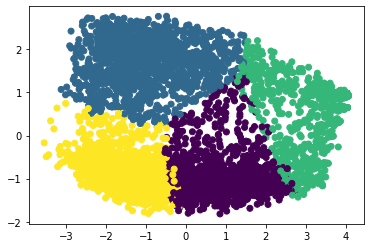

In [15]:
plt.scatter(Z[:, 0], Z[:, 1], c=y_pred)

In [16]:
#for testing we are trying 3-visualization
#let's define new PCA object with 3-dimension

pca_3d = PCA(n_components=3)

In [17]:
#converting X_train of 217-dimension to Z_3d of 3-dimension
Z_3d = pca_3d.fit_transform(X_test)

In [18]:
y_pred_test = model.fit_predict(X_test)

Z_3d.shape, y_pred_test.shape

((1268, 3), (1268,))

<IPython.core.display.Javascript object>


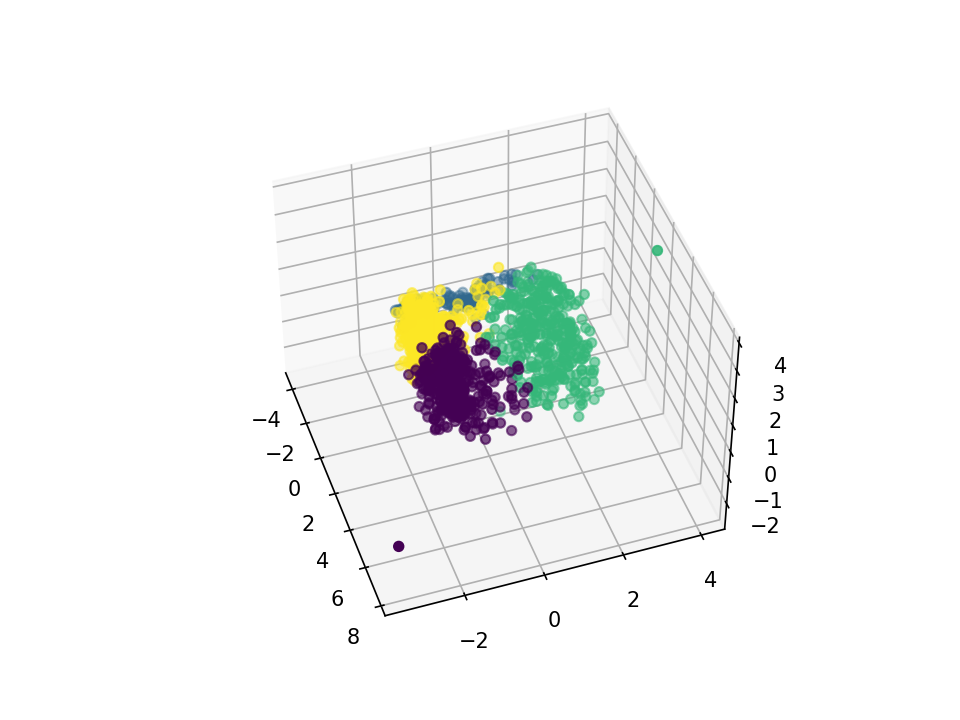

In [19]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_3d[:, 0], Z_3d[:, 1], Z_3d[:, 2], c=y_pred_test)
plt.show()